# MA417 Computation Methods in Finance - Python Worksheet Number 2

# Solutions

**Luitgard Veraart**

In this worksheet we will be writing Python code for generating random numbers.
We will consider three topics: 

1. Using numpy.random to generate random numbers from different distributions and plotting some histograms of our generated random numbers.
2. Implementing the inverse transform method to generate random numbers from the exponential distribution. 
3. Implementing the Von Neumann's Acceptance-Rejection method for generating a sample from the standard Normal distribution by sampling from the double exponential distribution. 
		
        
## Random number generation using numpy.random

### Relevant documentation
We will be using numpy.random to generate random numbers. For general information please refer to: https://numpy.org/doc/stable/reference/random/index.html

To find out about specific distributions see the last part here: 
https://numpy.org/doc/stable/reference/random/generator.html

### Example: Uniform distribution
The following piece of code shows you how you can generate a sample from the uniform distribution on $[0, 1)$ and how you can plot a histogram of this sample.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math   #  To compute the constant pi in Exercise 3

In [2]:
# Construct new Generator and fix seed for reproducability (here 12345).
rng = np.random.default_rng(12345)

In [3]:
# Decide on sample size
sample_size = 100000

In [4]:
# Sample from the uniform distribution on [0.0, 1.0).
myuniformsample = rng.random(size=sample_size)

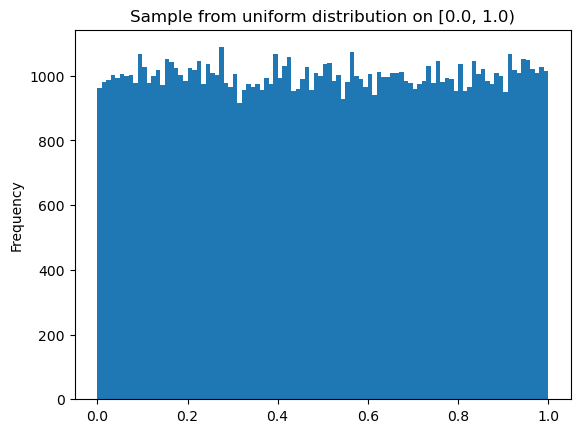

In [5]:
# Plot histogram of sample from uniform distribution on [0, 1).
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(myuniformsample, bins=100)
ax.set_title("Sample from uniform distribution on [0.0, 1.0)")
ax.set_ylabel("Frequency")
plt.show()

## Programming tasks

### Exercise 1
Write Python code that 
1. generates a sample from the standard normal distribution and plots it in a histogram;   
2. generates a sample from the normal distribution with mean 3 and variance 4 and plots it in a histogram;
3. generates a sample from the exponential distribution with mean 2 and plots it in a histogram. 

 __Hint:__ https://numpy.org/doc/stable/reference/random/generator.html
 

 ### Solution - Exercise 1

We first write a function that receives two arguments: mysample is a numpay array containing a sample of random variables and name_distribution is a string providing the name of a probability distribution. The function will plot a histogram of the sample and write the name of the distribution in the title of the histogram. 

In [6]:
def plot_histogram(mysample, name_distribution):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.hist(mysample, bins=100)
    ax.set_title('Histogram of sample from {} distribution'.format(name_distribution))
    ax.set_ylabel("Frequency")
    plt.show()

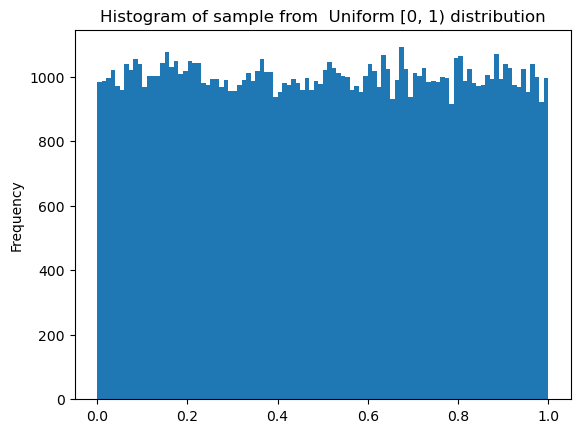

In [7]:
# Sampling from the uniform distribution on [0.0, 1.0):
myuniformsample = rng.random(size=sample_size)
# Plotting:
plot_histogram(myuniformsample, " Uniform [0, 1)")

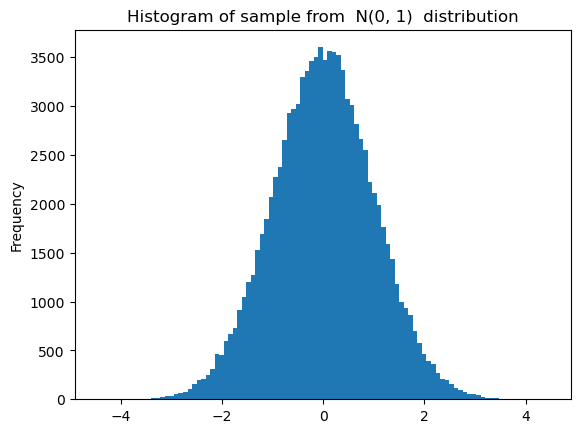

In [8]:
# Sampling from the standard normal distribution.
mystandardnormalsample = rng.standard_normal(size=sample_size)
# Plotting:
plot_histogram(mystandardnormalsample, " N(0, 1) ")

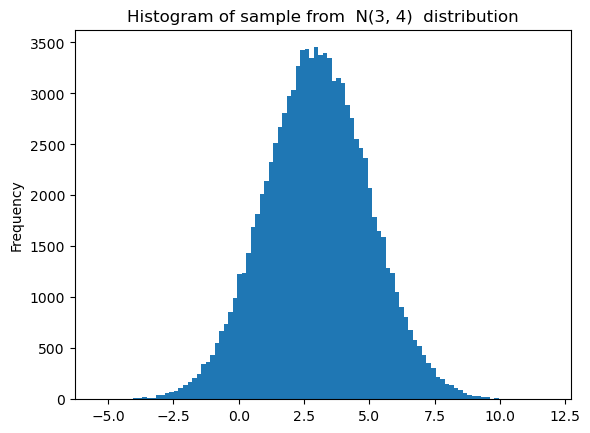

In [9]:
# Sampling from the non-standard normal distribution.
# Note that here loc refers to the mean and scale to the standard deviation.
mynormalsample = rng.normal(loc=3.0, scale=2.0, size=sample_size)
plot_histogram(mynormalsample, " N(3, 4) ")

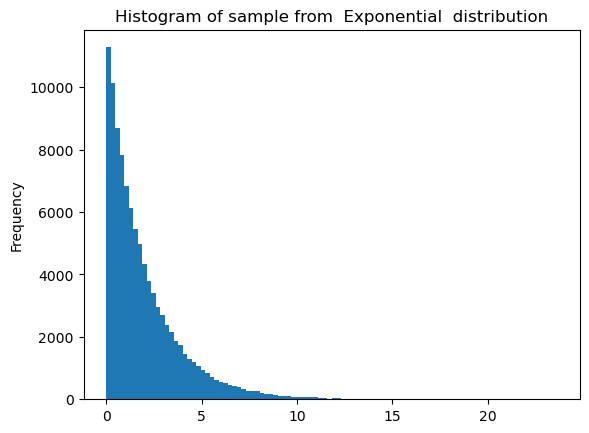

In [10]:
# Sampling from the exponential distribution.
# Note that scale corresponds to the mean here.
myexponentialsample = rng.exponential(scale=2.0, size=sample_size)
# Plotting:
plot_histogram(myexponentialsample, " Exponential ")

So far we have considered histograms that show frequencies. You can also use them to approximate a probability density funtion by setting density = True when you plot the histogram as follows: 


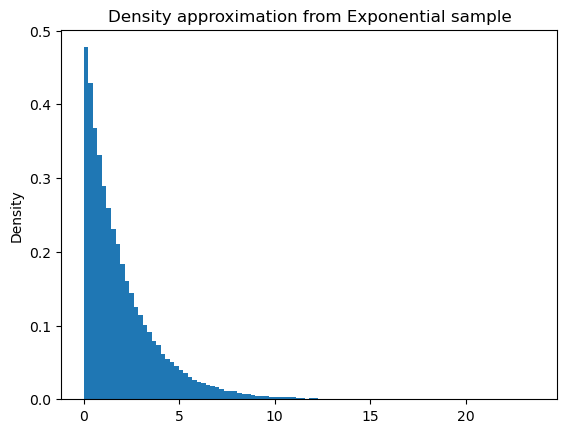

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(myexponentialsample, bins=100, density = True)
ax.set_title("Density approximation from Exponential sample")
ax.set_ylabel("Density")
plt.show()

 ### Exercise 2

1. Implement the inverse transform method yourself in Python for generating a sample from the exponential distribution with mean 5. To do this, use a method from numpy.random (see above!) to obtain a sample from the Uniform distribution. 

2. Produce a plot that shows two histograms next to each other: 
	The first histogram shows a sample from the exponential distribution using your inverse transform method. 
	The second histogram shows a sample from the exponential distribution using a suitable method from numpy.random (that you have used in the Exercise 1.3). 

### Solution to Exercise 2

We first create a sample from the exponential distribution with mean 5 using rng.exponential. 

In [12]:
myexponentialsample1 = rng.exponential(scale=5.0, size=sample_size)
print("Sample mean of first sample is ", np.mean(myexponentialsample1))
print("The sample variance is ", np.var(myexponentialsample1, ddof=1))

Sample mean of first sample is  4.996193474323005
The sample variance is  24.782139745611456


Next, we write our own function that implements the inverse transform method for generating a sample from the exponential distribution.  

In [13]:
# Sampling from the exponential distribution using own inverse transformation.
def myexponential(rng, myscale=1.0, samplesize=100000):
    myuniforms = rng.random(size=samplesize)
    mu = 1.0/myscale
    exponentials = - np.log(myuniforms)/mu
    return exponentials

In [14]:
myexponentialsample2 = myexponential(rng, 5.0, sample_size)
print("Sample mean of second sample is ", np.mean(myexponentialsample2))
print("The sample variance is ", np.var(myexponentialsample2, ddof=1))

Sample mean of second sample is  4.964882259582785
The sample variance is  24.554045740319772


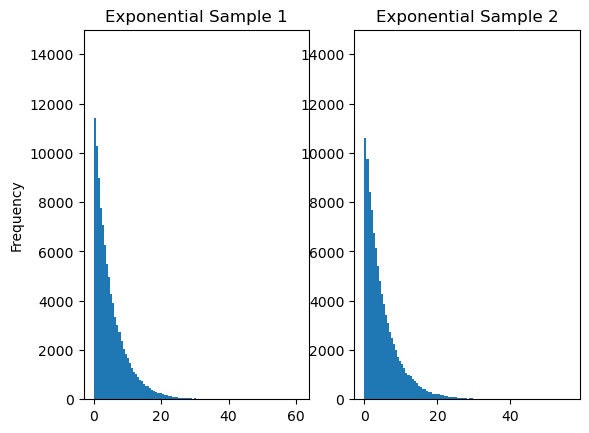

In [15]:
# Plotting the two exponentially distributed samples
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(myexponentialsample1, bins=100)
ax1.set_title("Exponential Sample 1")
ax1.set_ylabel("Frequency")
ax1.set_ylim((0, 15000))
ax2.hist(myexponentialsample2, bins=100)
ax2.set_title("Exponential Sample 2")
ax2.set_ylim((0, 15000))
plt.show()

### Exercise 3
1. Write a function in Python that implements the Von Neumann's acceptance-rejection method for generating a sample from the standard Normal distribution by sampling from the double exponential distribution. 
2. Then use your function to generate a normally distributed sample using Von Neumann's acceptance-rejection method and plot it in a histogram. 

__Hint:__ The double exponential distribution is also called Laplace distribution. 
	
2. Use Python code to work out the proportion of numbers that you reject when generating your sample. Check that this is consistent with the corresponding theoretical result derived in the lecture notes!   

### Solution to Exercise 3

In [16]:
# Choose sample size
sample_size = 10000

In [17]:
def f(x):
    result = np.exp(-0.5*x**2)/np.sqrt(2.0*math.pi)  # pdf standard normal
    return result

In [18]:
def g(x):
    result = 0.5*np.exp(-np.abs(x))  # pdf Laplace
    return result

In [19]:
def acceptance_rejection(rng, samplesize=1000):
    mysample = np.zeros(samplesize)
    # Number of trials until and including the first success (acceptance)
    numberoftrials = np.ones(samplesize)
    accepted = False
    c = np.sqrt(2.0*np.exp(1.0)/math.pi)
    for i in range(samplesize):
        while not accepted:
            mylaplace = rng.laplace(loc=0.0, scale=1.0, size=1)
            myratio = f(mylaplace)/(g(mylaplace)*c)
            myuniform = rng.random(size=1)
            if myuniform <= myratio:
                accepted = True
            else:
                numberoftrials[i] += 1
        mysample[i] = mylaplace
        accepted = False
    return mysample, numberoftrials

In [20]:
(mystandardnormalsample1, trials) = acceptance_rejection(rng, sample_size)

In [21]:
# Compute specific constant c (see lecture notes)
constant_c = np.sqrt(2.0*np.exp(1.0)/math.pi)

In [22]:
# Compute proportion of rejected numbers based on sample
proprej = (np.sum(trials)-sample_size)/np.sum(trials)

In [23]:
print("Proportion of rejected numbers based on sample: ", proprej)

Proportion of rejected numbers based on sample:  0.23159674197018595


In [24]:
print("Theoretical result is 1 - 1/c = ", 1.0 - 1.0/constant_c)

Theoretical result is 1 - 1/c =  0.23982654946685966


In [25]:
# Generating a sample using rng.standard_normal
mystandardnormalsample2 = rng.standard_normal(sample_size)

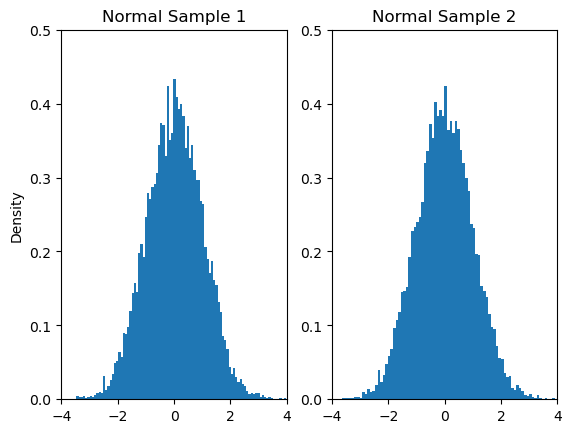

In [26]:
# Plotting the two normally distributed samples
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(mystandardnormalsample1, bins=100, density = True)
ax1.set_title("Normal Sample 1")
ax1.set_ylabel("Density")
ax1.set_ylim((0, 0.5))
ax1.set_xlim((-4, 4))
ax2.hist(mystandardnormalsample2, bins=100, density = True)
ax2.set_title("Normal Sample 2")
ax2.set_ylim((0, 0.5))
ax2.set_xlim((-4, 4))
plt.show()